# Homework 6

- [homework](https://github.com/alexkolo/ml-zoomcamp-2024/blob/main/cohorts/2024/06-trees/homework.md)
- [submit here](https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw06)
    - Due date: 5 November 2024 00:00 (local time)
    - [link to notebook](https://github.com/alexkolo/ml-zoomcamp-2024/blob/main/cohorts/2024/06-trees/hw06_my_answers.ipynb)

### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).



In [1]:
# !wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [2]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
df: pd.DataFrame = pd.read_csv(filepath_or_buffer="jamb_exam_results.csv")
df.columns = df.columns.str.lower().str.replace(pat=" ", repl="_")
df = df.drop(columns=["student_id"]).fillna(value=0)

In [8]:
seed = 1
f_text = 0.2
f_val = 0.2
df_test: pd.DataFrame
df_val: pd.DataFrame
df_train: pd.DataFrame
df_full_train, df_test = train_test_split(df, test_size=f_text, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=f_val, random_state=seed)

In [5]:
target: str = "jamb_score"

In [9]:
dv = DictVectorizer(sparse=False)
X_train: np.ndarray = dv.fit_transform(X=df_train.drop(columns=target).to_dict(orient="records"))
X_val: np.ndarray = dv.transform(X=df_val.to_dict(orient="records"))
X_test: np.ndarray = dv.transform(X=df_test.to_dict(orient="records"))

y_train: np.ndarray = df_train[target].to_numpy()
y_val: np.ndarray = df_val[target].to_numpy()
y_test: np.ndarray = df_test[target].to_numpy()

In [57]:
dv_features: np.ndarray = dv.get_feature_names_out()

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`


### Answer

`study_hours_per_week`

### Code

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=1)

In [61]:
split_feature: str = dv_features[dt.feature_importances_ == 1][0]
split_feature

'study_hours_per_week'

In [62]:
# Feature is used for splitting the data
print(export_text(decision_tree=dt, feature_names=dv_features))

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 191



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 22.13
* 42.13
* 62.13
* 82.12


### Answer

`42.13`

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [68]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X=X_train, y=y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [72]:
y_pred: np.ndarray = rf.predict(X_val)
score_rmse: float = root_mean_squared_error(y_true=y_val, y_pred=y_pred)

print(f"RMSE: {score_rmse:.2f}")

RMSE: 41.61


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200


### Answer

`80`

In [ ]:
# `n_estimators` parameter Try different values of this parameter from 10 to 200 with step 10.

res: dict[int, float] = {}
for n_estimators in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf.fit(X=X_train, y=y_train)
    y_pred: np.ndarray = rf.predict(X_val)
    score_rmse: float = root_mean_squared_error(y_true=y_val, y_pred=y_pred)
    res[n_estimators] = score_rmse
    print(f"n_estimators={n_estimators}, rmse={score_rmse:.3f}")

n_estimators=10, rmse=41.61
n_estimators=20, rmse=40.94
n_estimators=30, rmse=40.40
n_estimators=40, rmse=40.25
n_estimators=50, rmse=40.33
n_estimators=60, rmse=40.28
n_estimators=70, rmse=40.21
n_estimators=80, rmse=40.22
n_estimators=90, rmse=40.30
n_estimators=100, rmse=40.35
n_estimators=110, rmse=40.33
n_estimators=120, rmse=40.31
n_estimators=130, rmse=40.33
n_estimators=140, rmse=40.32
n_estimators=150, rmse=40.30
n_estimators=160, rmse=40.32
n_estimators=170, rmse=40.33
n_estimators=180, rmse=40.35
n_estimators=190, rmse=40.37


In [91]:
df_res = pd.DataFrame.from_dict(data=res, orient="index", columns=["rmse"])
df_res.round(3).T

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190
rmse,41.609,40.937,40.404,40.251,40.326,40.284,40.215,40.223,40.296,40.349,40.326,40.306,40.334,40.321,40.299,40.323,40.329,40.354,40.366


70


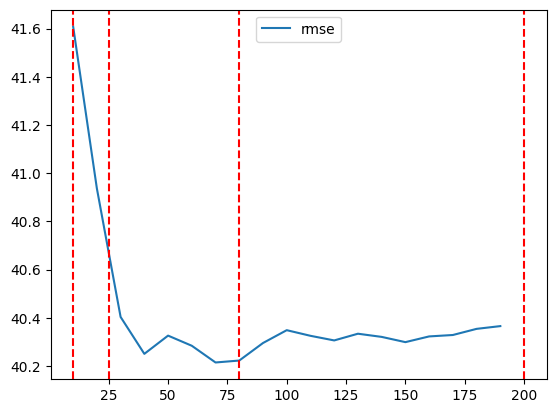

In [130]:
g = df_res.plot()
print(df_res["rmse"].idxmin())
for v in [10, 25, 80, 200]:
    g.axvline(x=v, color="red", ls="--")

In [144]:
len(np.gradient(df_res.squeeze(), df_res.index))

19

In [145]:
len(df_res)

19

90


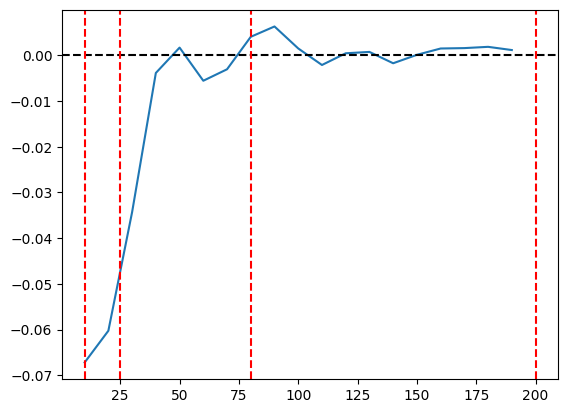

In [150]:
# show gradient
res_grad = pd.Series(np.gradient(df_res.squeeze(), df_res.index), index=df_res.index)
print(res_grad.idxmax())
g = res_grad.plot()
g.axhline(0, color="k", ls="--")
for v in [10, 25, 80, 200]:
    g.axvline(x=v, color="red", ls="--")

rmse    50
dtype: int64


<Axes: >

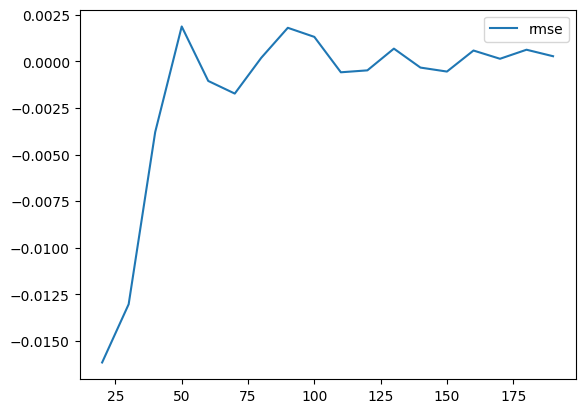

In [134]:
pct = df_res.pct_change(periods=1)
print(pct.idxmax())
pct.plot()

In [138]:
abs_diff = df_res.diff().abs()
abs_diff.sort_values(by="rmse", ascending=True).head(2)

,rmse
170,0.005892
80,0.008039


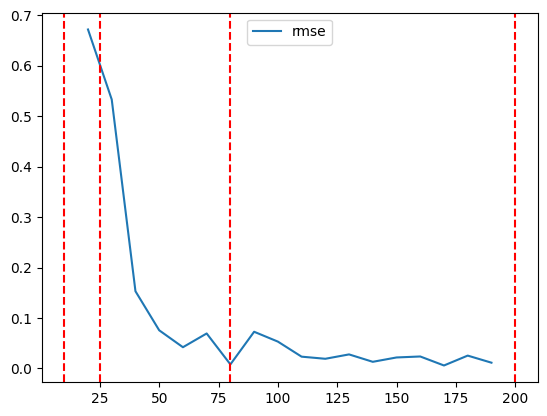

In [137]:
g = df_res.diff().abs().plot()
for v in [10, 25, 80, 200]:
    g.axvline(x=v, ls="--", color="red")

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25


### Answer

`10`

In [151]:
res: dict[tuple[int, int], float] = {}
for d in [10, 15, 20, 25]:
    for n_estimators in range(10, 200, 10):
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X=X_train, y=y_train)
        y_pred: np.ndarray = rf.predict(X_val)
        score_rmse: float = root_mean_squared_error(y_true=y_val, y_pred=y_pred)
        res[(d, n_estimators)] = score_rmse

In [ ]:
df_res = pd.DataFrame.from_dict(data=res, orient="index", columns=["rmse"])
df_res.index = pd.MultiIndex.from_tuples(df_res.index, names=["max_depth", "n_estimators"])
# df_res.head()

In [167]:
# best `max_depth`, using the mean RMSE
df_res["rmse"].idxmin()[0]

np.int64(10)

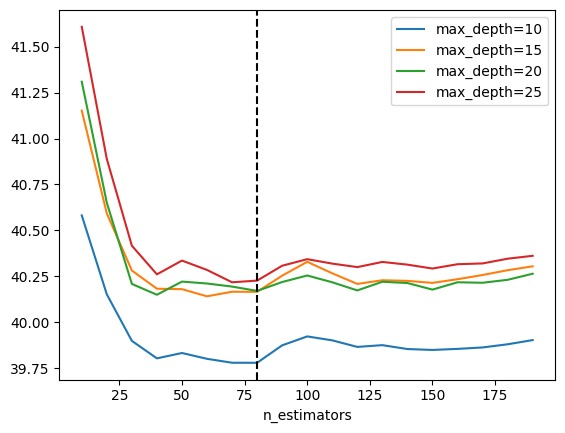

In [170]:
d = 10
g = df_res.loc[d].rename(columns={"rmse": f"max_depth={d}"}).plot()
for d in [15, 20, 25]:
    df_res.loc[d].rename(columns={"rmse": f"max_depth={d}"}).plot(ax=g)
g.axvline(x=df_res["rmse"].idxmin()[1], color="k", ls="--")
g.legend()

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`


### Answer

`study_hours_per_week`


In [171]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X=X_train, y=y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
pd.Series(data=rf.feature_importances_, index=dv_features).sort_values(ascending=False).head(n=4)

study_hours_per_week    0.239245
attendance_rate         0.151180
distance_to_school      0.141347
teacher_quality         0.080320
dtype: float64

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value


### Results

0.3 : 42.38
0.1 : 40.20 -> lowest, aka best

### Answer

`0.1`

In [ ]:
# !uv pip install xgboost

Audited 1 package in 2ms


In [178]:
import xgboost as xgb

In [179]:
features: list[str] = list(dv_features)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [180]:
watchlist: list[tuple[xgb.DMatrix, str]] = [(dtrain, "train"), (dval, "val")]

In [197]:
xgb_params: dict[str, int | float | str] = {
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

In [196]:
# %%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-rmse:42.91051	val-rmse:44.64705
[5]	train-rmse:34.75100	val-rmse:40.18339
[10]	train-rmse:31.99488	val-rmse:39.86428
[15]	train-rmse:29.89650	val-rmse:40.13093
[20]	train-rmse:28.09664	val-rmse:40.26037
[25]	train-rmse:26.07609	val-rmse:40.48417
[30]	train-rmse:24.87680	val-rmse:40.71177
[35]	train-rmse:23.58326	val-rmse:40.86652
[40]	train-rmse:22.24228	val-rmse:40.97970
[45]	train-rmse:20.98592	val-rmse:41.19294
[50]	train-rmse:20.17649	val-rmse:41.24907
[55]	train-rmse:19.04615	val-rmse:41.38122
[60]	train-rmse:18.27209	val-rmse:41.62695
[65]	train-rmse:17.29323	val-rmse:41.82979
[70]	train-rmse:16.37294	val-rmse:41.92156
[75]	train-rmse:15.87567	val-rmse:41.99138
[80]	train-rmse:15.15253	val-rmse:42.04253
[85]	train-rmse:14.64793	val-rmse:42.04437
[90]	train-rmse:13.87089	val-rmse:42.20004
[95]	train-rmse:13.16711	val-rmse:42.35369
[99]	train-rmse:12.55993	val-rmse:42.37920


In [ ]:
# s = output.stdout

In [ ]:
# print(s[:200])

In [193]:
y_pred = model.predict(dval)
score_rmse: float = root_mean_squared_error(y_true=y_val, y_pred=y_pred)
print(f"RMSE: {score_rmse:.2f}")

RMSE: 40.20
